In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('5d.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

In [3]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [7]:
# noise removal
kernel = np.ones((2,2),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

In [8]:
# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)

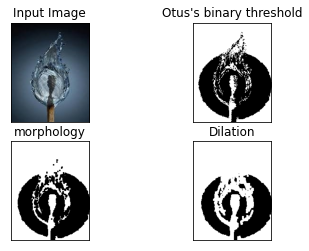

In [11]:
plt.subplot(221),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(thresh, 'gray')
plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(closing, 'gray')
plt.title("morphology"), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(sure_bg, 'gray')
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.show()